## **Shopify Data Science Intern Challenge**

Question 1: Given some sample data, write a program to answer the following:

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

1. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.
2. What metric would you report for this dataset?
3. What is its value?

Answer 1:

In [50]:
import pandas as pd
import numpy as np
# Read the given dataset and store in dataframe df
df= pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")
df.head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01
6,7,87,915,149,1,cash,2017-03-01 21:37:57
7,8,22,761,292,2,cash,2017-03-08 2:05:38
8,9,64,914,266,2,debit,2017-03-17 20:56:50
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26


**Exploratory Analysis:**

In [51]:
# Analyse order_amount feature to find out the issues with the average order value
df.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

The analysis shows that min order is 90 and orders value at 25% is 163 which seems fine. But at 75% (Percentile) the value os 390 and max value is 704000, which is a huge gap as compared to the min value and 25% value. It indicates the outliers. So to make sure we will plot the scatter plot to see the same exists.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2094: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): rug.
  warnings.warn(msg, UserWarning)


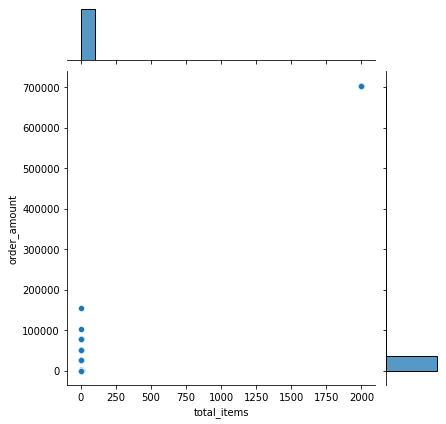

In [52]:
import seaborn as sns
sns.jointplot(x='total_items',y='order_amount',marginal_kws=dict(bins=20, rug=True), data=df)

The scatter plot shows the upper limit of the order amount is around 700000 and all other values are mostly scattered around 0-100. This plot shows the presence of oulier as well. So does affects the mean value. 

In [53]:
print("Old Mean:",df.order_amount.mean())

Old Mean: 3145.128


Answer 1(a): The mean value is far away from the median value which is 284.0. Here we can say that the median is representing the true picture of the order values as the outliers are pushing the value of mean higher. We can choose median as the better metric to calculate the average order value or we can also remove the outlier to find the new value of mean.

In [54]:
#Find the 99th percentile value of the order_amount
upper_limit = np.percentile(df.order_amount,[99])[0]
upper_limit 

25725.0

In [55]:
df[(df.order_amount>upper_limit)].shape

(44, 7)

In [56]:
#Outliers are present above 98%
#Find the 98th percentile value of the order_amount
upper_limit = np.percentile(df.order_amount,[98])[0]
df[(df.order_amount>upper_limit)]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
...,...,...,...,...,...,...,...
4868,4869,42,607,704000,2000,credit_card,2017-03-22 4:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 4:00:00
4918,4919,78,823,25725,1,cash,2017-03-15 13:26:46
4952,4953,26,786,880,5,cash,2017-03-17 1:50:18


In [57]:
#List of all the transactions with order amount greater than the 98% value
df[(df.order_amount>upper_limit) & (df.shop_id==42)]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
938,939,42,808,1056,3,credit_card,2017-03-13 23:43:45
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1364,1365,42,797,1760,5,cash,2017-03-10 6:28:21
1367,1368,42,926,1408,4,cash,2017-03-13 2:38:34
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1471,1472,42,907,1408,4,debit,2017-03-12 23:00:22


In [58]:
df[(df.order_amount>upper_limit) & (df.shop_id==26)]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
4523,4524,26,995,880,5,credit_card,2017-03-09 8:28:31
4952,4953,26,786,880,5,cash,2017-03-17 1:50:18


In [59]:
df[(df.order_amount>upper_limit) & (df.shop_id==78)]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
511,512,78,967,51450,2,cash,2017-03-09 7:23:14
617,618,78,760,51450,2,cash,2017-03-18 11:18:42
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20


After exploring further it seems that there were fraudulent activities which were done at time 4:00:00 at shop id 42 with credit card.

In [60]:
#Outliers are present above 98%
#Find the 98th percentile value of the order_amount
upper_limit = np.percentile(df.order_amount,[98])[0]
print("Upper limit:",upper_limit)
## Way to handle outlier
df[(df.order_amount>3*upper_limit)]= 3*upper_limit

Upper limit: 800.0799999999981


So after treating the outliers, the scatter plot is given below. It is far better representation of the order value.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2094: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): rug.
  warnings.warn(msg, UserWarning)


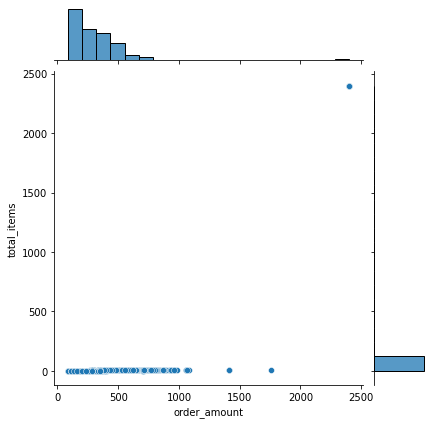

In [61]:
# The scatter plot after treating the outliers
sns.jointplot(x='order_amount',y='total_items',marginal_kws=dict(bins=20, rug=True), data=df)

Answer 1(b): These are the two possible matrices that can represent the average order value. The mean value after treating the outliers and unaffected median.

In [62]:
print("New mean:",np.mean(df.order_amount))

New mean: 329.0110239999999


In [63]:
print("New mean:",np.median(df.order_amount))

New mean: 284.0


Answer 1(c):

In nutshell, Even after treating the outliers the new mean value is little far away from the median. We can use the median as its best metric to find the average order value which is 284.0. and can aviod counting the outlier/fraudulent activity or any anomaly present in the data. 

Question 2: 

For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

(a) How many orders were shipped by Speedy Express in total?

(b) What is the last name of the employee with the most orders?

(c) What product was ordered the most by customers in Germany?





Answer 2(a):



SELECT count(Orders.OrderID) FROM Orders 

JOIN Shippers ON Shippers.ShipperID= Orders.ShipperID

WHERE ShipperName='Speedy Express'





Output: Total order are:54

Answer 2(b):


SELECT Employees.LastName,max(OrderDetails.Quantity)

FROM Employees

JOIN Orders ON Orders.EmployeeID= Employees.EmployeeID

JOIN OrderDetails ON OrderDetails.OrderID= Orders.OrderID


Output: Last Name= Fuller, Quantity= 120

Answer 2(c):

SELECT sub.ProductName, max(sub.Qua) from 

(SELECT p.ProductName, sum(Quantity) as Qua

FROM OrderDetails o 

INNER JOIN Products p ON o.ProductID=p.ProductID

INNER JOIN Suppliers s ON p.SupplierID=s.SupplierID

WHERE s.Country='Germany'

GROUP BY p.ProductID)sub



Output: Product Name:  Gumbär Gummibärchen, Quantity: 232